## Blackjack Game by Leonardo

In [1]:
from art import tprint
import random
import ipyplot
import cv2
import glob
import numpy as np
import time

## Global variable declarations:

In [2]:
round_number = 1

player_wins = 0
cpu_wins = 0
ties = 0

round_break = False
turn_number = 1

cards = []
card_images = []

player_cards = []
cpu_cards = []

player_scores = []
cpu_scores = []

player_total_score = 0
cpu_total_score = 0

player_money = 0
cpu_money = 0

Deck will be defined here as a single deck of cards and related to their face value in BlackJack. For that matter, it's datatype will be a dictionary in Python.
Cards will be defined per consequence as the mix of cards played in the game. Therefore, it could be composed on between 1 to 8 decks. A list datatype suffises for my intentions with the game.

In [3]:
deck = {}
# The deck will be composed by a dictionary, with keys defined as the card name and the values defining
# the points/score for each card

for i in ["♠", "♥", "♦", "♣"]:
    for j in range(2,11):
        deck[str(j)+i] = j

    for k in ["J", "Q", "K"]:
        deck[str(k)+i] = 10

    deck["A"+i] = "choose"

cards = list(deck.keys())

## Functions declarations

In [4]:
def welcome_screen():
    """
    Function with the purpose of greeting the player and inviting him to play
    
    Output: a graphic visual with the game's name
    """
    
    tprint("BLACK",font="block")
    tprint("JACK",font="block")
    
    print()
    print('{:^110}'.format('ARE YOU READY FOR A CHICKEN DINNER ?'))
    print()
    print("-"*110)
    print("-"*110)
    print("-"*110)
    print()
    
    return None

In [5]:
def show_deck():
    
    number_of_decks_used = input("Choose the number of decks you would like to play with (from 1 to 8): \n")
    
    while number_of_decks_used not in range(1,9):
        try:
            number_of_decks_used = int(number_of_decks_used)
        except:
            number_of_decks_used = input("Please, try again. You need to choose an integer between 1 and 8 for the number of decks:\n")

        else:
            number_of_decks_used = int(number_of_decks_used)
            if int(number_of_decks_used) != number_of_decks_used:
                number_of_decks_used = input("Please, try again. You need to choose an INTEGER between 1 and 8 for the number of decks:\n")
    
    cards = []
    for i in range(number_of_decks_used):
        cards += list(deck.keys())
    
    deck_image = []
    files = glob.glob("/Users/oleoaraujo/Documents/Github/data-ft-par-labs/Projects/Week-1/your-project/*.png")
    
    for i in range(number_of_decks_used):
        for myFile in files:
            image = cv2.imread(myFile)
            deck_image.append(image)
    
    print(f"\nNice choice! Your deck has then {len(cards)} CARDS and here are the cards in your full deck:")
    if number_of_decks_used == 1:
        ipyplot.plot_images(deck_image, max_images=8, img_width=900)
    if number_of_decks_used > 1:
        ipyplot.plot_images(deck_image, max_images=8, img_width=450)
    
    time.sleep(3)
    
    return None

In [6]:
def load_images(card_images):
    suits = ['heart', 'club', 'diamond', 'spade']
    face_cards = ['jack', 'queen', 'king']

    extension = 'ppm'

    # for each suit, retrieve the image for the cards
    for suit in suits:
        # first the number cards 1 to 10
        for card in range(1, 11):
            name = 'cards/{}_{}.{}'.format(str(card), suit, extension)
            image = tkinter.PhotoImage(file=name)
            card_images.append((card, image,))

        # next the face cards
        for card in face_cards:
            name = 'cards/{}_{}.{}'.format(str(card), suit, extension)
            image = tkinter.PhotoImage(file=name)
            card_images.append((10, image,))

In [7]:
def reset_all(deck=deck):
    """
    This function has the objective of reseting:
    1. The GUI screen
    2. the deck of cards after every round, since the deck is used with no replacement of cards during each turn of play
    3. all the other variables related to the player and the CPU
    
    Input: deck (as a dictionary)
    Output: cards = multiple times the deck (as a list)"""
    
    global turn_number, round_break, cards, player_cards, player_scores, player_total_score, cpu_cards, cpu_scores, cpu_total_score
    global cpu_card_frame
    global player_card_frame
    
    # embedded frame to hold the card images
    cpu_card_frame.destroy()
    cpu_card_frame = tkinter.Frame(card_frame, background='green')
    cpu_card_frame.grid(row=0, column=1, sticky='ew', rowspan=2)
    
    # embedded frame to hold the card images
    player_card_frame.destroy()
    player_card_frame = tkinter.Frame(card_frame, background="green")
    player_card_frame.grid(row=2, column=1, sticky='ew', rowspan=2)

    result_text.set("")
    
    turn_number = 1
    round_break = False
    
    cards = []
    
    player_cards = []
    player_scores = []
    player_total_score = 0
    player_money = 0
    
    cpu_cards = []
    cpu_scores = []
    cpu_total_score = 0
    
    time.sleep(3)
    
    return None

In [8]:
def bets():
    """This function has the objective of keeping track of the bets made by the player.
    By default, the CPU will always accept the bet of the player and go agains him.
    It also updates the amount of money in the account of the PLAYER and CPU."""
    
    global player_money, cpu_money, turn_break, round_break, game_break, bet
    
    while player_money == 0 and cpu_money == 0:
        
        cpu_money = player_money = input("How many $ you want to place to your pot ? \n ")
        
        try:
            player_money = int(player_money)
        except:
            print("You should input A NUMBER for the bet. Please, try again.")
            player_money = 0
            cpu_money = 0
        else:
            if int(player_money) != player_money:
                print("You should input an INTEGER number for the bet. Please, try again.")
                player_money = 0
                cpu_money = 0
            else:
                player_money = int(player_money)
                cpu_money = int(player_money)
    
    print(f"\n\nYou have {player_money}$ available for betting.")
    print(f"The CPU has {cpu_money}$ available for betting.\n\n")
    
    if (player_money>0 and cpu_money==0) or (player_money==0 and cpu_money>0):
        turn_break = True
        round_break = True
        game_break = True
        return None
    
    bet = 0
    
    while bet == 0 and player_money>=0 and cpu_money>=0:
        
        bet = input(f"Place your bet for the round {round_number} and turn {turn_number} : \n")
        
        try:
            bet = int(bet)
        except:
            print("You should input A NUMBER for the bet. Please, try again.")
        else:
            if int(bet) != bet:
                print("You should input an INTEGER number for the bet. Please, try again.")
                player_bet = 0
            elif int(bet)> player_money or int(bet)> cpu_money:
                max_bet = min(cpu_money, player_money)
                print(f"You should input a number equal of inferior to {max_bet}. Please, try again.")
                bet = 0
            else:
                bet = int(bet)
        
        print()
        print()
        
    return None

In [9]:
def choice_of_cards(cards=cards):
    """
    Function randomly choosing a card for the PLAYER or the CPU. The deck is first shuffled and then the
    1st card is picked.
    """
    #chosen_card = random.choices(cards)
    random.shuffle(cards)
    chosen_card = cards.pop(0)
    
    return chosen_card

In [10]:
def card_points(card_chosen, deck=deck):
    """This function determines the punctuation of each card (either draw by the player or the cpu)
    
    Input: card to be evaluated and the deck dictionary
    Output: punctuation of the card
    """
    
    if card_chosen[0] in range (0,11):
        return card_chosen[0]
    
    elif deck[card_chosen[0]] == "choose":
        flag = True
        points = input("Nice ! You got an Ace ! Choose if you want to attribute 1 or 11 points to this card :\n")
        print()
        
        while flag:
            try:
                points = int(points)
            except:
                points=input("Please, try again. You need to choose 1 or 11 points to this card :\n")
            else:
                if int(points) == 1 or int(points) == 11:
                    flag = False
                    break
                else:
                    points=input("Please, try again. You need to choose 1 or 11 points to this card :\n")
        return int(points)
    
    else:
        print("There's a problem with the ponctuation of cards.\n")
        return 0

In [12]:
def player_turn(deck=deck):
    """
    This function defines all the tasks that are executed when a card is to be drawn by the player,
    updating the necessary variables : from player_card, to the new cards (deck) and the player_score.
    """
    
    global player_card_frame, player_total_score, player_scores, player_cards, cards
    
    player_card = None
    
    # Drawing a card from the deck: removing it from the deck
    player_card = choice_of_cards(cards)
    
    # Allocating the drawn card to the player
    player_cards.append(player_card)
    
    # Updating the photo in the GUI interface (tkinter)
    tkinter.Label(player_card_frame, image=player_card[1], relief='raised').pack(side='left')

    # Score updates
    player_scores.append(card_points(player_card))
    player_total_score = sum(score for score in player_scores)
    player_score_label.set(player_total_score)
    
    return None

In [13]:
def cpu_turn(deck=deck):
    """
    This function defines all the tasks that are executed when a card is to be drawn by the CPU (dealer),
    updating the necessary variables : from player_card, to the new cards (deck) and the player_score.
    """
    
    global cpu_card_frame, cpu_total_score, cpu_cards, cards
    
    # Drawing a card from the deck: removing it from the deck and allocating it to the cpu:
    if cpu_total_score < 16:
        cpu_card = choice_of_cards(cards)
        tkinter.Label(cpu_card_frame, image=cpu_card[1], relief='raised').pack(side='left')
        
        cpu_cards.append(cpu_card)
        
    # Score updates
        cpu_scores.append(card_points(cpu_card))
        cpu_total_score = sum(score for score in cpu_scores)
        cpu_score_label.set(cpu_total_score)
    
    return None

In [14]:
def goodbye_window():
    """
    Farewell to the player after he entered "Q" to quit the game.
    
    Output: a graphic visual with a goodbye message
    """
    
    tprint("GOODBYE","rnd-xlarge")
    #tprint("BYE",font="block")
    
    print()
    print('{:^110}'.format('SEE YOU SOON'))
    print()
    print()
    return None

In [15]:
def quit_game(): 
    global mainWindow
    mainWindow.destroy()

## Main Code Execution

## BONUS PART - Bring in the big guns : GUI !


 .----------------.  .----------------.  .----------------.  .----------------.  .----------------.
| .--------------. || .--------------. || .--------------. || .--------------. || .--------------. |
| |   ______     | || |   _____      | || |      __      | || |     ______   | || |  ___  ____   | |
| |  |_   _ \    | || |  |_   _|     | || |     /  \     | || |   .' ___  |  | || | |_  ||_  _|  | |
| |    | |_) |   | || |    | |       | || |    / /\ \    | || |  / .'   \_|  | || |   | |_/ /    | |
| |    |  __'.   | || |    | |   _   | || |   / ____ \   | || |  | |         | || |   |  __'.    | |
| |   _| |__) |  | || |   _| |__/ |  | || | _/ /    \ \_ | || |  \ `.___.'\  | || |  _| |  \ \_  | |
| |  |_______/   | || |  |________|  | || ||____|  |____|| || |   `._____.'  | || | |____||____| | |
| |              | || |              | || |              | || |              | || |              | |
| '--------------' || '--------------' || '--------------' || '--------------' || '--------


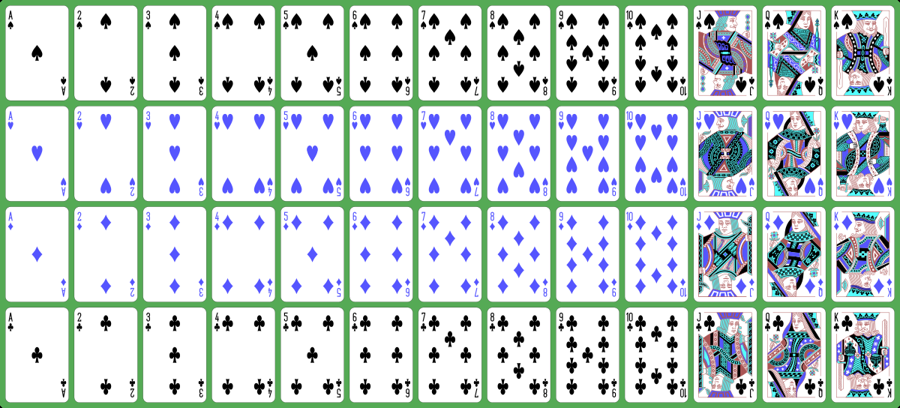


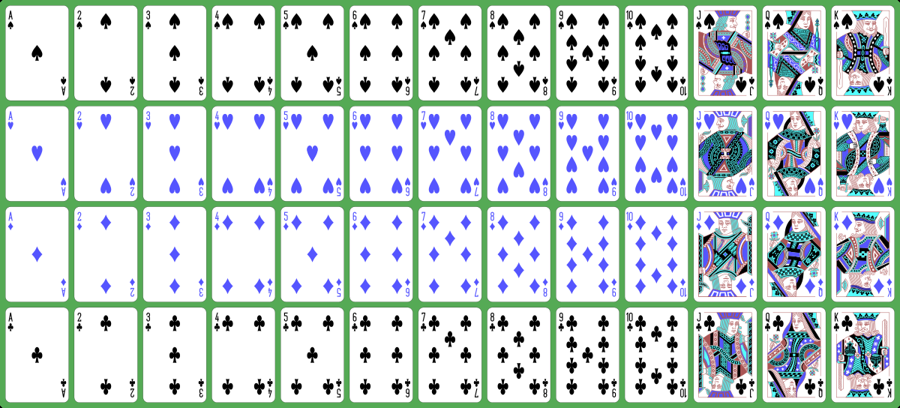

                                                                                                                       
      # ###            # ###          # ###          ##### ##         ##### ##        ##### /    ##        ##### ##    
    /  /###  /       /  /###        /  /###       /#####  /##      ######  /##     ######  /  #####     ######  /### / 
   /  /  ###/       /  /  ###      /  /  ###    //    /  / ###    /#   /  / ##    /#   /  /     #####  /#   /  / ###/  
  /  ##   ##       /  ##   ###    /  ##   ###  /     /  /   ###  /    /  /  ##   /    /  ##     # ##  /    /  /   ##   
 /  ###           /  ###    ###  /  ###    ###      /  /     ###     /  /   /        /  ###     #         /  /         
##   ##          ##   ##     ## ##   ##     ##     ## ##      ##    ## ##  /        ##   ##     #        ## ##         
##   ##   ###    ##   ##     ## ##   ##     ##     ## ##      ##    ## ## /         ##   ##     #        ## ##         
##   ##  /###  / ##   ##     ## ##   ## 

In [16]:
import tkinter

welcome_screen()
show_deck()

mainWindow = tkinter.Tk()

# Set up the screen and frames for the dealer and player
mainWindow.title("Black Jack")
mainWindow.geometry("640x480")
mainWindow.configure(background='green')

result_text = tkinter.StringVar()
result = tkinter.Label(mainWindow, textvariable=result_text)
result.grid(row=0, column=0, columnspan=3)

player_wins_text = tkinter.StringVar()
result = tkinter.Label(mainWindow, textvariable=player_wins_text)
result.grid(row=0, column=10, columnspan=3)

card_frame = tkinter.Frame(mainWindow, relief="sunken", borderwidth=1, background="green")
card_frame.grid(row=1, column=0, sticky='ew', columnspan=3, rowspan=2)

cpu_score_label = tkinter.IntVar()
tkinter.Label(card_frame, text="Dealer (CPU)", background="green", fg='white').grid(row=0, column=0)
tkinter.Label(card_frame, textvariable=cpu_score_label, background="green", fg="white").grid(row=1, column=0)

# embedded frame to hold the card images
cpu_card_frame = tkinter.Frame(card_frame, background="green")
cpu_card_frame.grid(row=0, column=1, sticky="ew", rowspan=2)

player_score_label = tkinter.IntVar()
tkinter.Label(card_frame, text="Player", background="green", fg="white").grid(row=2, column=0)
tkinter.Label(card_frame, textvariable=player_score_label, background="green", fg="white").grid(row=3, column=0)

# embedded frame to hold the card images
player_card_frame = tkinter.Frame(card_frame, background="green")
player_card_frame.grid(row=2, column=1, sticky='ew', rowspan=2)

button_frame = tkinter.Frame(mainWindow)
button_frame.grid(row=3, column=0, columnspan=3, sticky='w')

dealer_button = tkinter.Button(button_frame, text="Dealer draw", command=cpu_turn)
dealer_button.grid(row=0, column=0)

player_button = tkinter.Button(button_frame, text="Player draw", command=player_turn)
player_button.grid(row=0, column=1)

new_game_button = tkinter.Button(button_frame, text="         ")
new_game_button.grid(row=0, column=2)

new_game_button = tkinter.Button(button_frame, text="Another Round", command=reset_all)
new_game_button.grid(row=0, column=3)

#shuffle_button = tkinter.Button(button_frame, text="Quit")
#shuffle_button.grid(row=0, column=4)

quit_button = tkinter.Button(button_frame, text = "Quit", command = quit_game)
quit_button.grid(row=0, column=4)

# load cards
cards = []
load_images(cards)

# Create a new deck of cards and shuffle them
#deck = list(cards) + list(cards) + list(cards)
#shuffle()

# Create the list to store the dealer's and player's hands
#dealer_hand = []
#player_hand = []

#new_game()

mainWindow.mainloop()

goodbye_window()